# Wk 7. Computer Vision


컴퓨터 비전에는 많은 데이터가 필요하며, 차이를 구분하고 궁극적으로 이미지를 인식할 때까지 데이터 분석을 반복적으로 실행한다.

예를 들어 자동차 타이어를 인식하도록 컴퓨터를 훈련시키려면, 결함이 없는 타이어를 인식하고 차이점을 학습하기 위해 방대한 양의 타이어 이미지와 타이어 관련 데이터를 공급해야 한다.

이를 위해 두 가지 필수 기술이 사용되는데, 하나는 딥 러닝이라고 하는 일종의 머신 러닝이고 다른 하나는 컨볼루션 신경망(CNN)이다. 이번 주에는 개념은 CNN에 대한 내용으로 하고, 과제에 대한 내용은 머신 러닝으로 타이타닉 데이터를 분석해 생존을 예측하는 모델을 구현해보는 것으로 한다.

## 합성곱 신경망(Convolutional Neural Networks, CNNs)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">

  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>


## 완전연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함

- 모든 입력데이터를 동등하게 취급
  즉, **데이터의 특징을 잃어버리게 됨**

- 컨볼루션층(convolution layer)은 <u>**이미지 픽셀 사이의 관계를 고려**</u>

- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지
  - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지

  - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구


## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행

  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함

  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림

    - 왼쪽, 오른쪽을 다르게 주어야함

    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>

  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의)
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $

- 일반적으로 stride=2, kernel_size=2 를 통해
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미

## 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


## Computer Vision (CNN 및 시각화 연습)

### modules import

In [ ]:
#사용하는 모듈을 import해준다.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO


### util functions

In [ ]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

def filtered_image(image, filter, output_size):
  filtered_img = np.zeros((output_size, output_size))
  filter_size = filter.shape[0]

  for i in range(output_size):
    for j in range(output_size):
      multiply_values = image[i:(i+filter_size), j:(j+filter_size)] * filter
      sum_value = np.sum(multiply_values)

      if(sum_value > 255):
        sum_value = 255

      filtered_img[i,j] = sum_value

  return filtered_img


### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image.shape: (440, 440)


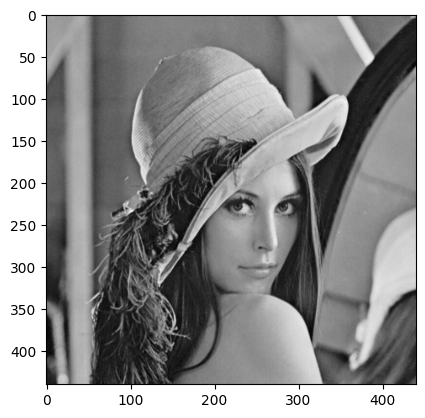

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png" #Lenna image는 cv에서 가장 기본적으로 많이 사용하는 이미지이다.
image = url_to_image(image_url, gray=True)
print("image.shape:", image.shape)

plt.imshow(image, cmap='gray') #cmap을 gray로 지정: 흑백 사진을 불러올 수 있음
plt.show()

image.shape: (440, 440, 3)


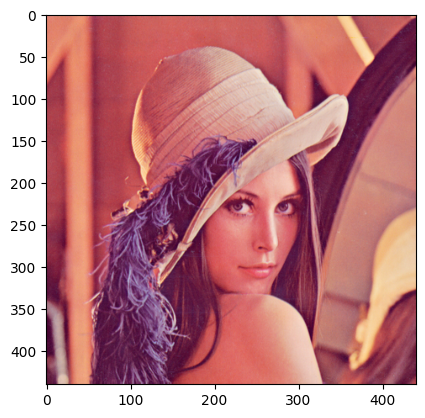

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"

image = url_to_image(image_url)
print("image.shape:", image.shape)

plt.imshow(image) #cmap에 별다른 값을 지정하지 않으면, 결과값에 (440,440,3)이 나오면서, 다양한 색의 Lenna image가 import된다.
plt.show()

### 필터연산 적용

output size: 438


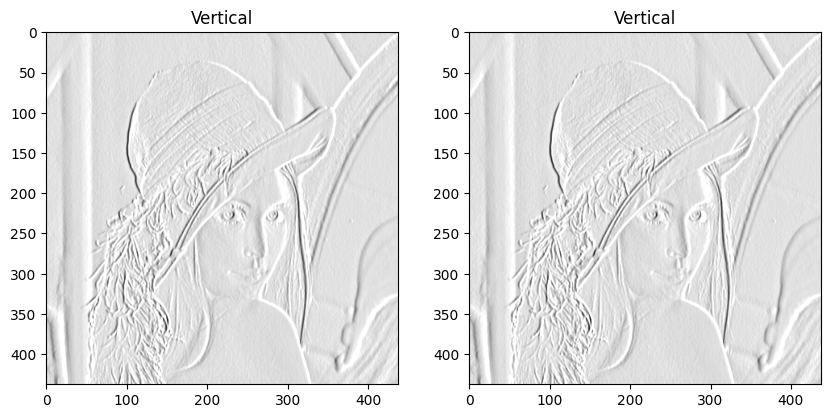

In [ ]:
vertical_filter = np.array([[1.,2.,1.,],
                            [0.,0.,0.],
                            [-1.,-2.,-1.]])
horizontal_filter = np.array([[1.,2.,1.,],
                              [0.,0.,0.],
                              [-1.,-2.,-1.]])
output_size = int((image.shape[0]-3) / 1+1)
print("output size:", output_size)
vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')

plt.subplot(1,2,2)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')
plt.show()

### 이미지 필터를 적용한 최종 결과

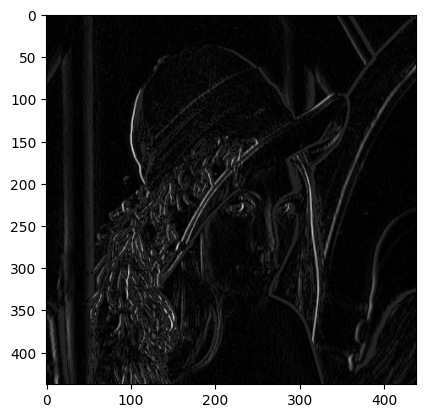

In [ ]:
sobel_img = np.sqrt(np.square(horizontal_filtered)+np.square(vertical_filtered))
plt.imshow(sobel_img, cmap='gray')

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>



### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함

  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함

  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>



### modules import

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

### util functions

In [ ]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

def conv_op(image, kernel, pad=0, stride=1): #convolution 함수로 정의를 바꿔주기
  H, W, C = image.shape
  kernel_size = kernel.shape[0]

  out_h = (H+2*pad-kernel_size) // stride+1
  out_h = (H+2*pad-kernel_size) // stride+1

  filtered_img = np.zero(out_h, out_W)
  image = np.pad(image, [(pad, pad), (pad, pad), (0,0)], 'constant')
  for i in range(out_w):
    for c in range(C):
      multiply_values = image[i:(i+kernel_size), j:(j+kernel_size), c] * kernel
      sum_value = np.sum(multiply_values)

      filtered_img[i,j] += sum_value
      filtered_img = filtered_img.reshape(1, out_h, out_w, -1).transpose(0,3,1,2)
      return filtered_img.astype(np.uint8)

### 이미지 확인

image.shape: (440, 440, 3)


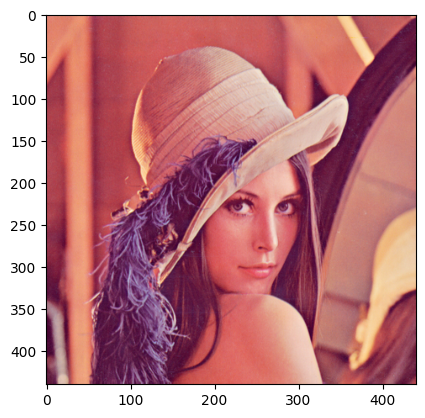

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"

image = url_to_image(image_url)
print("image.shape:", image.shape)

plt.imshow(image) #cmap에 별다른 값을 지정하지 않으면, 결과값에 (440,440,3)이 나오면서, 다양한 색의 Lenna image가 import된다.
plt.show()

# 합성곱 신경망 구현


## 합성곱 층(Convolution Layer)

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

  N, C, H, W = input_data.shape #N=개수, C=채널, H=높이, W=폭
  out_h = (H+2*pad-filter_h) // stride +1
  out_w = (W+2*pad-filter_w) // stride +1

  img = np.pad(input_data, [(0,0), (0,0), (pad,pad), (pad,pad)], 'constant')
  col = np.zeros((N,C,filter_h,filter_w,out_h,out_w))

  for y in range(filter_h):
    y_max = y+stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      col[:,:,y,x,:,:] = img[:,:,y:y_max:stride, x:x_max:stride]

  col = col.transpose(0,4,5,1,2,3).reshape(N*out_h*out_w, -1)
  return col

def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):

  N,C,H,W = input_shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0,3,4,5,1,2)

  img = np.zeros((N,C,H+2*pad+stride-1, W+2*pad+stride-1))
  for y in range(filter_h):
    y_max = y+stride*out_h
    for x in range(filter_w):
      x_max = x + stride*out_w
      img[:,:,y:y_max:stride, x:x_max:stride]+= col[:,:,y,x,:,:]

  return img[:,:,pad:H+pad, pad:W+pad]


In [ ]:
class Conv2D:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

    self.input_data = None
    self.col = None
    self.col_W = None

    self.dW = None
    self.db = None

  def forward(self, input_data):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = input_data.shape
    out_h = (H + 2*self.pad - FH) // self.stride+1
    out_w = (W + 2*self.pad - FW) // self.stride+1

    col = im2col(input_data, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T

    out = np.dot(col, col_W)+self.b
    output = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)

    self.input_data = input_data
    self.col = col
    self.col_W = col_W

    return output

  def backward(self, dout):
    FN, C, FH, FW = self.W.shape
    dout = dout.transpose(0,2,3,1).reshape(-1, FN)
    self.db = np.sum(dout, axis = 0)
    self.dW = np.dot(self.col.T, dout)
    self.dW = self.dW.transpose(1,0).reshape(FN, C, FH, FW)

    dcol = np.dot(dout, self.col_W.T)
    dx = col2im(dcol, self.input_data.shape, FH, FW, self.stride, self.pad)

    return dx

### 컨볼루션 레이어 테스트

In [ ]:
def init_weight(num_filters, data_dim, kernel_size, stride=1, pad=0, weight_std=0.01):

  weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
  biases = np.zeros(num_filters)

  return weights, biases

image.shape: (440, 440, 1)


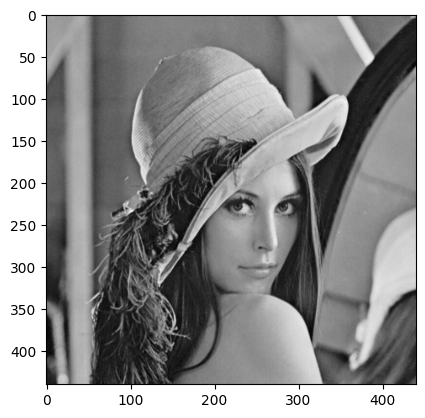

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0],-1,1)
print("image.shape:", image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2,0,1), axis=0)

plt.imshow(image_gray[0,0,:,:], cmap='gray')
plt.show()

In [ ]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W, b)
output = conv.forward(image_gray)


print("Conv Later suze:", output.shape)

Conv Later suze: (1, 1, 438, 438)


In [ ]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W,b)
output = conv.forward(image_gray)

print("Conv layer size:", output.shape)

Conv layer size: (1, 1, 438, 438)


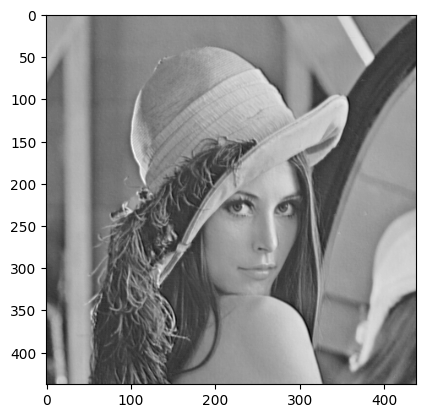

In [ ]:
plt.imshow(output[0,0,:,:], cmap = 'gray')
plt.show()

In [ ]:
W2, b2 = init_weight(1, 1, 3, stride=2)
conv2 = Conv2D(W2, b2, stride=2)
output2 = conv.forward(image_gray)

print("Conv Later suze:", output.shape)

Conv Later suze: (1, 1, 438, 438)


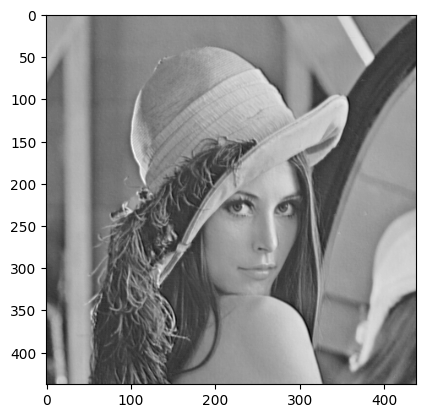

In [ ]:
plt.imshow(output[0,0,:,:], cmap = 'gray')
plt.show()

image.shape: (440, 440, 3)


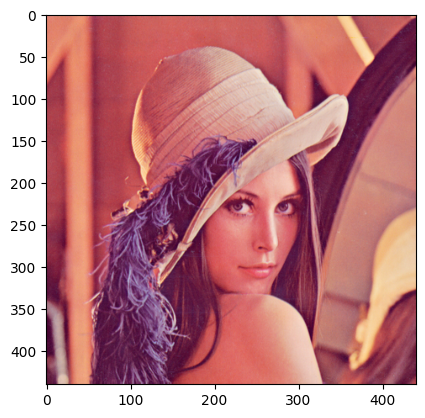

image.shape: (1, 3, 440, 440)


In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"
image_color = url_to_image(img_url)
print("image.shape:", image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = np.expand_dims(image_color.transpose(2,0,1), axis=0)
print("image.shape:", image_color.shape)

In [ ]:
W3, b3 = init_weight(10, 3, 3)
conv3 = Conv2D(W3, b3)
output3 = conv3.forward(image_color)


print("Conv Layer size:", output3.shape)

Conv Layer size: (1, 10, 438, 438)


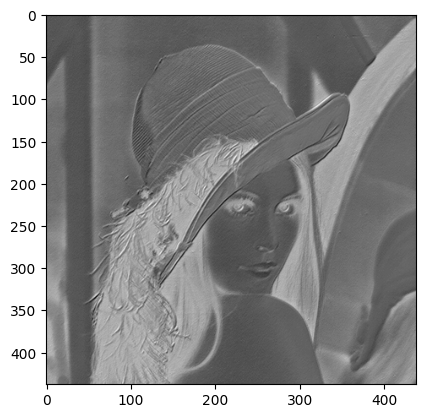

In [ ]:
plt.imshow(output3[0,3,:,:], cmap = 'gray')
plt.show()

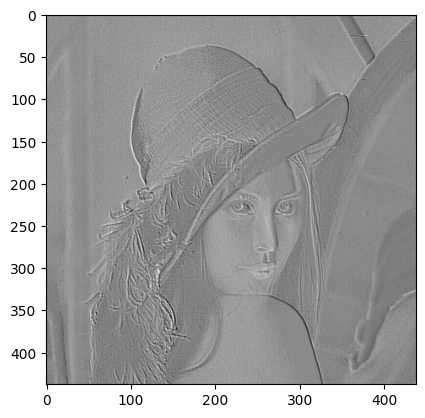

In [ ]:
plt.imshow(output3[0,8,:,:], cmap = 'gray') #output 값을 3에서 8로 증가시켰을 때 이미지가 선명해진다
plt.show()

### 동일한 이미지 여러 장 테스트 (배치 처리)

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0],-1,1)
print("image.shape:", image_gray.shape)

image_gray = image_gray.transpose(2,0,1)
print("image_gray.sape:", image_gray.shape)

image.shape: (440, 440, 1)
image_gray.sape: (1, 440, 440)


In [ ]:
batch_image_gray = np.repeat(image_gray[np.newaxis, :, :, :], 15, axis=0)
print(batch_image_gray.shape)

(15, 1, 440, 440)


In [ ]:
W4, b4 = init_weight(10, 1, 3, stride = 2)
conv4 = Conv2D(W4, b4)
output4 = conv4.forward(batch_image_gray)

print("Conv Layer size:", output4.shape)

Conv Layer size: (15, 10, 438, 438)


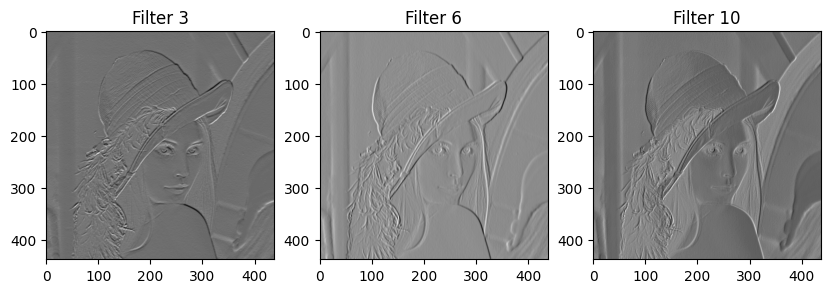

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("Filter 3")
plt.imshow(output4[3,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("Filter 6")
plt.imshow(output4[3,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("Filter 10")
plt.imshow(output4[3,9,:,:], cmap='gray')

plt.show()

In [ ]:
W5, b5 = init_weight(32, 3, 3, stride = 3)
conv5 = Conv2D(W5, b5, stride=3)
output5 = conv5.forward(image_color)

print("Conv Layer size:", output5.shape)

Conv Layer size: (1, 32, 146, 146)


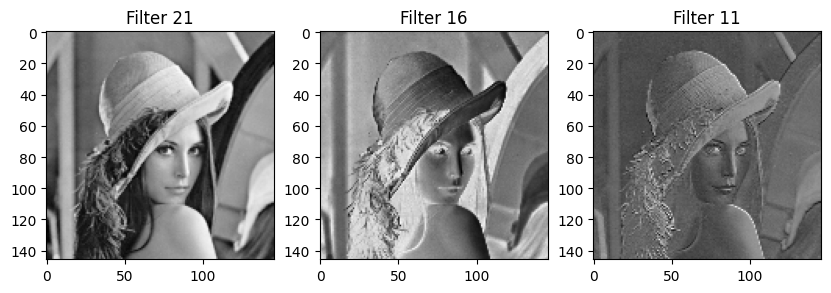

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("Filter 21")
plt.imshow(output5[0,20,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("Filter 16")
plt.imshow(output5[0,14,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("Filter 11")
plt.imshow(output5[0,10,:,:], cmap='gray')

plt.show()

### 동일한 이미지 배치처리(color)

image.shape: (440, 440, 3)


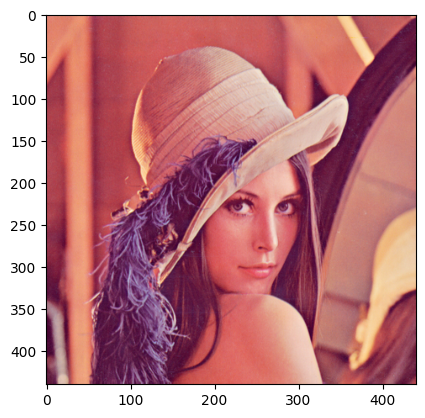

image.shape: (3, 440, 440)


In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/440px-Lenna_%28test_image%29.png"
image_color = url_to_image(img_url)
print("image.shape:", image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = image_color.transpose(2,0,1)
print("image.shape:", image_color.shape)

## 풀링 층(Pooling Layer)

In [ ]:
class Pooling2D:
  def __init__(self, kernel_size=2, stride=1, pad=0):
    self.kernel_size=kernel_size
    self.stride = stride
    self.pad = pad

    self.input_data = None
    self.arg_max = None

  def forward(self, input_data):
    N, C, H, W = input_data.shape
    out_h = (H-self.kernel_size) // self.stride +1
    out_w = (W-self.kernel_size) // self.stride +1

    col = im2col(input_data, self.kernel_size, self.kernel_size, self.stride, self.pad)
    col = col.reshape(-1, self.kernel_size*self.kernel_size)

    arg_max = np.argmax(col, axis=1)
    out = np.max(col, axis=1)
    output = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)

    self.input_data = input_data
    self.arg_max = arg_max

    return output

  def backward(self, dout):
    dout = dout.transpose(0,2,3,1)

    pool_size = self.kernel_size * self.kernel_size
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arrange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape+(pool_size,))

    dcol = dmax.reshape(dmax.shape[0]*dmax.shape[1]*dmax.shape[2],-1)
    dx = col2im(dcol, self.input_data.shape, self.kernel_size, self.kernel_size, self.stride, self.pad)
    return dx

# 대표적인 CNN 모델

## LeNet - 5

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">

  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## AlexNet

- 활성화 함수로 **ReLU** 사용

- 국소적 정규화(Local Response normalization, LRN) 실시하는 계층 사용

- 드롭아웃

  <img src="https://miro.medium.com/proxy/1*qyc21qM0oxWEuRaj-XJKcw.png" width="800">

  <center>[AlexNet 구조]</center>

  <sub>출처: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf</sub>

## VGG - 16

- 모든 컨볼루션 레이어에서의 필터(커널) 사이즈를 **3x3**으로 설정

- 2x2 MaxPooling

- 필터의 개수는 Conv Block을 지나가면서 2배씩 증가
  32 -> 64 -> 128

  <br>

  <img src="https://www.researchgate.net/profile/Jose_Cano31/publication/327070011/figure/fig1/AS:660549306159105@1534498635256/VGG-16-neural-network-architecture.png" width="800">

  <center>[VGG-16 구조]</center>

  <sub>출처: Very Deep Convolutional Networks for Large-Scale Image Recognition</sub>

## Pytorch 로 CNN 모델 구현하기

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# 모델 정의
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = x.view(-1, 64*3*3)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Model()

summary(model, (1, 28, 28))